# Рынок заведений общественного питания Москвы

Мы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами мы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможем ли мы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?
Мы — гуру аналитики, и партнёры просят нас подготовить исследование рынка. У нас есть открытые данные о заведениях общественного питания в Москве.
<br>
<br>
План проекта:
<br>
1 Изучение и предобработка данных
<br>
2 Анализ данных
<br>
2.1 Виды объектов общественного питания
<br>
2.2 Посадочные места
<br>
2.3 Расположение
<br>
3 Общий вывод
<br>
<br>
Описание данных:
<br>
Таблица rest_data:
<br>
id — идентификатор объекта;
<br>
object_name — название объекта общественного питания;
<br>
chain — сетевой ресторан;
<br>
object_type — тип объекта общественного питания;
<br>
address — адрес;
<br>
number — количество посадочных мест.
<br>

## Изучение и предобработка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from pylab import rcParams
import plotly.express as px
from plotly import graph_objects as go

pd.options.display.max_colwidth = 210

In [2]:
url = 'https://drive.google.com/file/d/1ETs3F7tssP9vRsEHCDMHEYWiZn21ZmN6/view?usp=share_link'
path = 'https://drive.google.com/uc?export=download&id=' + url.split('/')[-2]
data = pd.read_csv(path)
data.head(3)

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95


В данных нет пропусков - это здорово. Рассмотрим столбцы 'object_name', 'object_type' и 'address' на предмет явных и неявных дубликатов:

In [3]:
data.duplicated(subset=['object_name', 'object_type', 'address']).sum()

171

In [4]:
print('До удаления дубликатов:', len(data))
data = data.drop_duplicates(subset=['object_name', 'object_type', 'address']).reset_index()
print('После удаления:', len(data))

До удаления дубликатов: 15366
После удаления: 15195


In [5]:
data['object_type'].value_counts()

кафе                                 6017
столовая                             2575
ресторан                             2275
предприятие быстрого обслуживания    1891
бар                                   853
буфет                                 571
кафетерий                             393
закусочная                            348
магазин (отдел кулинарии)             272
Name: object_type, dtype: int64

In [6]:
# Приведем названия заведений к нижнему регистру:
data['object_name'] = data['object_name'].str.lower()
data['object_name'].value_counts().head(20)

столовая                    320
кафе                        242
шаурма                      241
шоколадница                 156
kfc                         155
макдоналдс                  148
бургер кинг                 136
теремок                      94
домино'с пицца               90
крошка картошка              90
пекарня                      80
буфет                        75
милти                        72
суши wok                     72
папа джонс                   51
додо пицца                   49
школьно-базовая столовая     44
кофе с собой                 43
чайхона №1                   42
донер кебаб                  41
Name: object_name, dtype: int64

Названия заведений заполнялись не по регламенту, есть некоторое количество неявных дубликатов, типа 'кафе "kfc"' и 'ростикс "kfc"', но названия не интересуют нас в рамках нашего исследования, только типы, так что оставим их как есть.

## Анализ данных

### Виды объектов общественного питания

Посмотрим на соотношение видов объектов общественного питания по количеству:

In [7]:
data['object_type'].value_counts()

кафе                                 6017
столовая                             2575
ресторан                             2275
предприятие быстрого обслуживания    1891
бар                                   853
буфет                                 571
кафетерий                             393
закусочная                            348
магазин (отдел кулинарии)             272
Name: object_type, dtype: int64

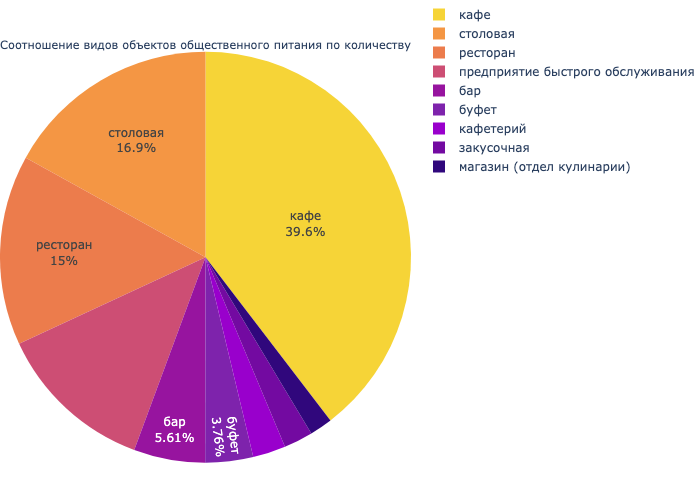

In [28]:
colors = ['#f6d437', '#f49644', '#ec7c4c', '#cd4e74', '#97149f', '#7e23ac', '#9900cc', '#730aa1', '#30077c']

fig = go.Figure(data=[go.Pie(labels=data['object_type'].value_counts().index, marker=dict(colors=colors), values=data['object_type'].value_counts(), textinfo='label+percent', title='Соотношение видов объектов общественного питания по количеству')])

fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide', margin=dict(l=0, r=0, b=0, t=0))
fig.show('png')


В Москве большую часть рынка общественного питания занимают кафе — 40%. На втором месте столовые, на третьем — рестораны. Фастфуды занимают только 12% от рынка, а бары — 5%.

Исследуем соотношение количества сетевых и несетевых заведений:

In [9]:
data['chain'].value_counts()

нет    12245
да      2950
Name: chain, dtype: int64

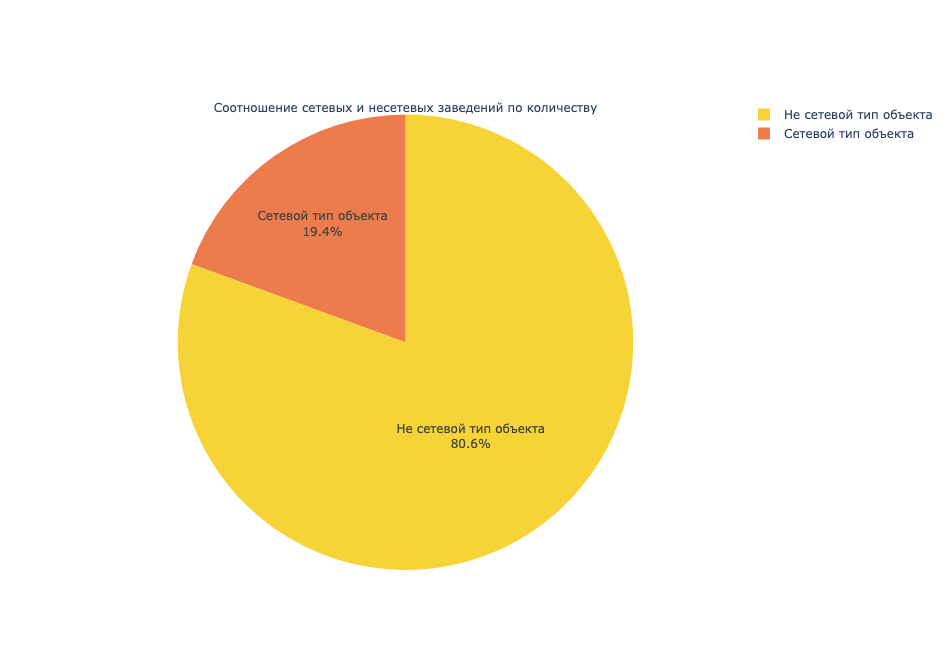

In [27]:
colors = ['#f6d437', '#ec7c4c']

labels = ['Не сетевой тип объекта','Cетевой тип объекта']

fig = go.Figure(data=[go.Pie(labels=labels, values=data['chain'].value_counts(), marker=dict(colors=colors), textinfo='label+percent', title='Соотношение сетевых и несетевых заведений по количеству')])

fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide', width=950, height=650)
fig.show('png')


Удивительно, но в Москве преобладают единичные кафе и рестораны — 12 тысяч заведений против 3 тысяч сетевых.

Выясним для какого вида объекта общественного питания характерно сетевое распространение:

In [11]:
data_chain_type = data.groupby(['object_type', 'chain'])['chain'].count().reset_index(name="chain_count")
data_chain_type.sort_values(by='chain_count', ascending=False)

,object_type,chain,chain_count
7,кафе,нет,4628
17,столовая,нет,2572
15,ресторан,нет,1734
6,кафе,да,1389
13,предприятие быстрого обслуживания,нет,1107
1,бар,нет,816
12,предприятие быстрого обслуживания,да,784
3,буфет,нет,560
14,ресторан,да,541
9,кафетерий,нет,342


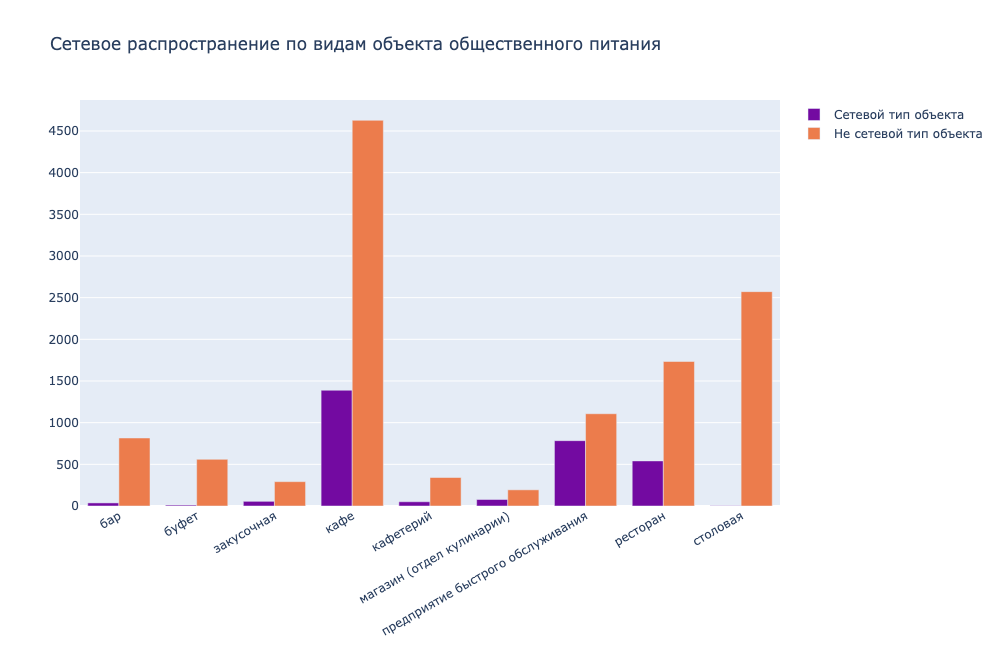

In [29]:
data_chain_type_yes = data_chain_type.query('chain == "да"')
data_chain_type_no = data_chain_type.query('chain == "нет"')

fig = go.Figure()
fig.add_trace(go.Bar(
    x=data_chain_type_yes["object_type"],
    y=data_chain_type_yes["chain_count"],
    name='Сетевой тип объекта',
    marker_color='#730aa1'
))
fig.add_trace(go.Bar(
    x=data_chain_type_no["object_type"],
    y=data_chain_type_no["chain_count"],
    name='Не сетевой тип объекта',
    marker_color='#ec7c4c'
))

fig.update_layout(title='Сетевое распространение по видам объекта общественного питания', xaxis_tickangle=-30, width=1000, height=650)
fig.show('png')


Сетевое распространение характерно для кафе, фастфудов и ресторанов.

### Посадочные места

Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

In [13]:
data_chain = data.query('chain == "да"')

data_chain_seats = data_chain.groupby('object_name').agg({'chain':'count' ,'number':'mean'}).reset_index()
data_chain_seats.sort_values(by='chain', ascending=False)



,object_name,chain,number
562,шоколадница,155,57.729032
25,kfc,155,55.341935
330,макдоналдс,148,88.378378
109,бургер кинг,136,46.889706
520,теремок,94,25.606383
...,...,...,...
240,кафе «торнадо»,1,80.000000
237,кафе «тапчан»,1,70.000000
236,кафе «тануки»,1,150.000000
235,кафе «суши сет»,1,7.000000


In [14]:
data_chain_seats.describe()

,chain,number
count,576.000000,576.000000
mean,5.121528,59.096423
std,15.444796,54.570319
min,1.000000,0.000000
25%,1.000000,20.000000
50%,1.000000,43.500000
75%,3.000000,83.297619
max,155.000000,306.000000


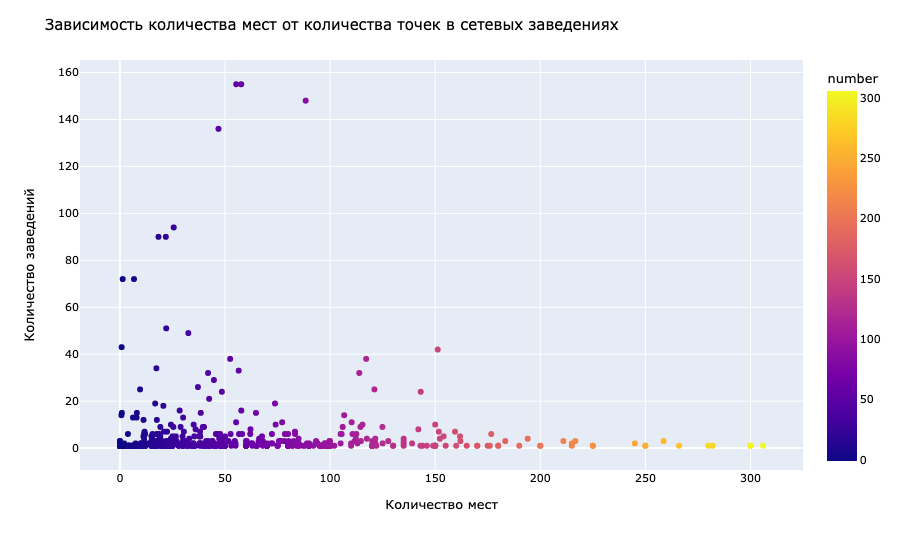

In [30]:
fig = px.scatter(data_chain_seats, x="number", y="chain", color='number')

fig.update_layout(title='Зависимость количества мест от количества точек в сетевых заведениях', uniformtext_minsize=10, uniformtext_mode='hide', width=900, height=550, xaxis_title="Количество мест", yaxis_title="Количество заведений", font=dict(size=11, color="black"))

fig.show('png')


На графике хорошо видно, что для сетевых заведений характерно меньшее количество заведений (1-3) с небольшим количеством (50, в среднем) посадочных мест.

Построим график среднего количества посадочных мест для каждого вида объекта общественного питания:

In [16]:
data_type_seats = data.groupby('object_type').agg({'number':'mean'}).reset_index()
data_type_seats.sort_values(by='number', ascending=False, inplace=True)

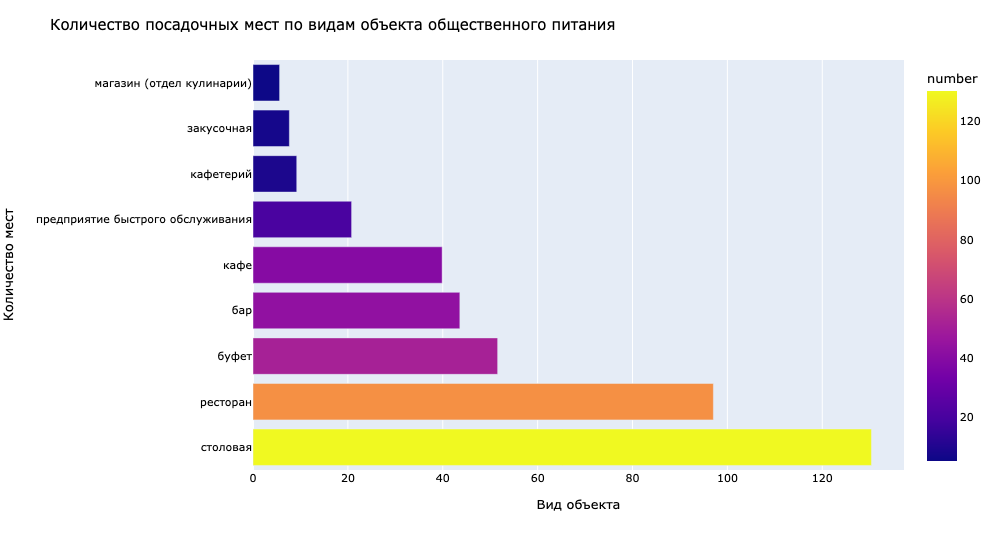

In [31]:
fig = px.bar(data_type_seats, x="number", y="object_type", color='number')

fig.update_layout(title='Количество посадочных мест по видам объекта общественного питания', uniformtext_minsize=10, uniformtext_mode='hide', width=1000, height=550, xaxis_title="Вид объекта", yaxis_title="Количество мест", font=dict(size=11, color="black"))
fig.show('png')


В среднем, наибольшее количество посадочных мест в столовых — 130. В ресторанах чуть меньше — почти 100. Третье место, с небольшими отрывами, делят буфеты, бары и кафе — 50, 43 и 40 посадочных мест соответственно. Наименьшее количество столиков в кулинариях.

### Расположение

Выделим улицы, на которых расположены наши заведения общественного питания, в отдельный столбец:

In [18]:
street_def = ['улица', 'ул.', 'переулок', 'пер.''проезд', 'пр.', 'прзд.', 'проспект', 'пр.', 'шоссе', 'ш.', 'микрорайон', 'мкр.', 'площадь', 'пл.', 'аллея', 'бульвар', 'набережная','наб.','тупик','линия']

def get_street(row):
    for e in row.split(','):
        for i in street_def:
            if i in e.lower():
                return e


In [19]:
data['street'] = data['address'].apply(get_street)

data['street'] = data['street'].str.strip()

data

,index,id,object_name,chain,object_type,address,number,street
0,0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица
...,...,...,...,...,...,...,...,...
15190,15359,222077,кофейня «шоколадница»,да,кафе,"город Москва, Кантемировская улица, дом 47",72,Кантемировская улица
15191,15360,219759,шоколадница,да,кафе,"город Москва, улица Вавилова, дом 3",36,улица Вавилова
15192,15361,208537,шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,3-й Крутицкий переулок
15193,15362,209264,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10,улица Земляной Вал


Теперь выделим улицы, которые особенно полюбились рестораторам:

In [20]:
top_streets = data['street'].value_counts().head(10).reset_index()
top_streets.columns = ['streetname', 'count']
top_streets

,streetname,count
0,проспект Мира,197
1,Профсоюзная улица,181
2,Ленинградский проспект,172
3,Пресненская набережная,165
4,Варшавское шоссе,164
5,Ленинский проспект,148
6,проспект Вернадского,127
7,Кутузовский проспект,114
8,Каширское шоссе,110
9,Кировоградская улица,107


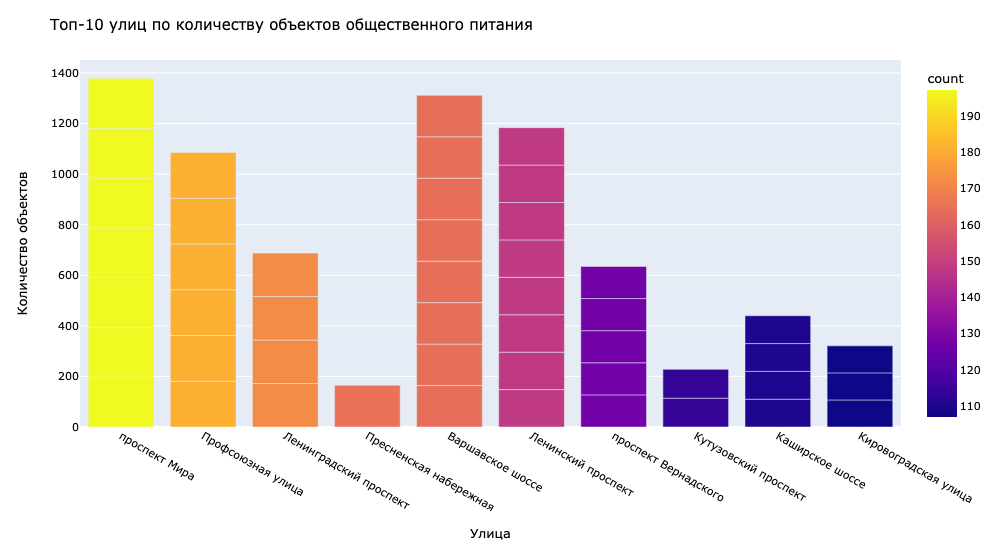

In [32]:
fig = px.bar(top_streets, x="streetname", y="count", color='count')

fig.update_layout(title='Топ-10 улиц по количеству объектов общественного питания', uniformtext_minsize=10, uniformtext_mode='hide', width=1000, height=550, xaxis_title="Улица", yaxis_title="Количество объектов", font=dict(size=11, color="black"))
fig.show('png')


Проспект Мира становится улицей с самым большим числом кафе, ресторанов, столовых и фастфудов — почти 200 заведений общественного питания. Ненамного отстают улицы Профсоюзная, Лениндградский проспект, Пресненская набережная и Варшавское шоссе. Все эти улицы и проспекты отличаются большой протяженностью, и неудивительно, что они становятся лидерами, ведь они могут вместить огромное количество заведений.

Теперь посмотрим в каких районах располагаются наши улицы:

In [22]:
# Загрузим данные с московскими улыцами и районами:
url = 'https://drive.google.com/file/d/1uyI2utKKzDpei4uODpv1hIPP3NIguULZ/view?usp=share_link'
path = 'https://drive.google.com/uc?export=download&id=' + url.split('/')[-2]
mosgaz_data = pd.read_csv(path)    

mosgaz_data

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район
...,...,...,...,...
4393,Вознесенский проезд,17,ЦАО,Пресненский район
4394,Волков переулок,17,ЦАО,Пресненский район
4395,Поварская улица,17,ЦАО,Пресненский район
4396,Кудринская площадь,17,ЦАО,Пресненский район


In [23]:
top_streets = top_streets.merge(mosgaz_data, on='streetname', how='left')
top_streets.head(7)

,streetname,count,areaid,okrug,area
0,проспект Мира,197,70,СВАО,Алексеевский район
1,проспект Мира,197,86,СВАО,Ярославский Район
2,проспект Мира,197,78,СВАО,Район Марьина роща
3,проспект Мира,197,79,СВАО,Останкинский район
4,проспект Мира,197,81,СВАО,Район Ростокино
5,проспект Мира,197,82,СВАО,Район Свиблово
6,проспект Мира,197,16,ЦАО,Мещанский район


Как и было отмечено раннее, улицы с наибольшим количеством заведений очень длинные (проспекты и шоссе, в основном) и входят сразу в несколько районов. Вот несколько районов, расположенных ближе к центру: Мещанский район, Пресненский район и Район Якиманка.

Найдем число улиц с одним объектом общественного питания:

In [24]:
one_rest_street = data.groupby('street').agg({'id':'count'}).reset_index()
one_rest_street = one_rest_street.query('id == 1')
one_rest_street.columns = ['streetname', 'count']
one_rest_street


,streetname,count
0,1-й Балтийский переулок,1
1,1-й Басманный переулок,1
2,1-й Голутвинский переулок,1
4,1-й Заречный переулок,1
5,1-й Зачатьевский переулок,1
...,...,...
1682,улица Шумилова,1
1683,улица Шумкина,1
1687,улица Щорса,1
1688,улица Энгельса,1


Узнаем в каких районах они находятся:

In [25]:
one_rest_street = one_rest_street.merge(mosgaz_data, on='streetname', how='left')

one_rest_street

,streetname,count,areaid,okrug,area
0,1-й Балтийский переулок,1,54.0,САО,Район Аэропорт
1,1-й Басманный переулок,1,13.0,ЦАО,Басманный район
2,1-й Басманный переулок,1,15.0,ЦАО,Красносельский район
3,1-й Голутвинский переулок,1,21.0,ЦАО,Район Якиманка
4,1-й Заречный переулок,1,NaN,NaN,NaN
...,...,...,...,...,...
494,улица Шумилова,1,113.0,ЮВАО,Район Кузьминки
495,улица Шумкина,1,26.0,ВАО,Район Сокольники
496,улица Щорса,1,46.0,ЗАО,Район Солнцево
497,улица Энгельса,1,NaN,NaN,NaN


In [26]:
one_rest_street_area = one_rest_street.groupby('area').agg({'streetname':'count'}).reset_index()
one_rest_street_area.sort_values(by='streetname', ascending=False).head(10)

,area,streetname
90,Таганский район,26
3,Басманный район,24
77,Район Хамовники,24
91,Тверской район,20
20,Пресненский район,19
21,Район Арбат,18
13,Мещанский район,15
71,Район Соколиная Гора,12
33,Район Замоскворечье,11
86,Район Якиманка,10


В Москве примерно 500 улиц с одним заведением, причем большинство из них находятся в самом центре — Хамовники, Тверской, Арбат. Предположу, что такая картина сложилась из-за того, что в этих районах очень много небольших переулков, а стоимость аренды в историческом центре очень большая — отсюда и ситуация, что позволить себе открыть здесь кафе или ресторан могут лишь единицы.

# Общий вывод

Анализ данных о рынке московского общественного питания мы начали с предобработки: избавились от явных дубликатов, привели данные к нижнему регистру. В наименованиях заведений были неявные дубликаты, но они не интересовали нас в плоскости анализа — их мы оставили без изменений. Мы также добавили дополнительный столбец с названиями улиц. На их основе был произведен анализ месторасположения заведений.
<br>
<br>
Мы пришли к следующим выводам:
   - в Москве большую часть рынка общественного питания занимают кафе — 40%, на втором месте столовые, на третьем — рестораны;
   - в Москве преобладают единичные кафе и рестораны — 12 тысяч, сетевых — 3 тысячи;
   - сетевое распространение характерно для кафе, фастфудов и ресторанов, также для сетевых заведений характерно малое количество заведений с небольшим количеством посадочных мест;
   - наибольшее количество посадочных мест в столовых — 130 в среднем, в ресторанах чуть меньше — почти 100, на третьем месте буфеты, бары и кафе, а наименьшее количество столиков в кулинариях;
   - проспект Мира становится улицей с самым большим числом кафе, ресторанов, столовых и фастфудов, ненамного отстают улицы Прфсоюзная, Лениндградский проспект, Пресненская набережная и Варшавское шоссе — все эти улицы и проспекты отличаются большой протяженностью и входят сразу в несколько районов;
   - в Москве примерно 500 улиц с одним заведением, причем большинство из них находятся в самом центре — Хамовники, Тверской, Арбат. В этих районах очень много небольших переулков, а стоимость аренды в историческом центре очень большая —  позволить себе открыть здесь кафе или ресторан могут лишь единицы.

 
<br>
Предположив, что самые распространенные модели построения бизнеса в Москве являются самыми успешными и конкурентно способными, к коммерческому успеху может привести открытие несетевого кафе с максимальным количеством посадочным мест в 40 штук. Для определения района рекомендуется провести дополнительное исследование расположения с учетом картографических данных, доступности от метро и проходимости. В перспективе кафе можно развить в сеть, ведь эта ниша не так занята — только 20% заведений Москвы являются сетевыми и только 23% из числа всех кафе являются сетевыми.